In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy as SCC
from tensorflow.keras.optimizers import Adam
import glob
import pathlib

In [3]:
pic_path=pathlib.Path(r"C:\Users\aftha\OneDrive\Desktop\Mask detection dataset\Face Mask Dataset\face mask")

In [4]:
pic_path

WindowsPath('C:/Users/aftha/OneDrive/Desktop/Mask detection dataset/Face Mask Dataset/face mask')

In [5]:
mask=list(pic_path.glob('WithMask/*'))
nomask=list(pic_path.glob('WithoutMask/*'))

In [6]:
len(mask)

5000

In [7]:
len(nomask)

5000

In [8]:
pic_dict={'mask':mask,'nomask':nomask}

In [9]:
pic_class={'mask':0,'nomask':1}

In [10]:
x=[]
y=[]

In [11]:
for i in pic_dict:
    pic_path_list=pic_dict[i]
    for path in pic_path_list:
        img=cv2.imread(str(path))
        img=cv2.resize(img,(75,75))
        img=img/255
        x.append(img)
        y.append(pic_class[i])
        

In [12]:
x=np.array(x)
y=np.array(y)

In [13]:
print(x.shape)
print(y.shape)

(10000, 75, 75, 3)
(10000,)


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy 

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.75,random_state=1)

In [16]:
model=Sequential()

model.add(Conv2D(filters=150,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=100,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=70,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(90,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 150)       4200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 150)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 100)       135100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 100)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 70)        63070     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 70)         0

In [17]:
model.compile(optimizer='adam',loss=SCC(),metrics=['accuracy'])

In [18]:
hist=model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
235/235 [==============================] - 63s 267ms/step - loss: 0.1989 - accuracy: 0.9169 - val_loss: 0.1110 - val_accuracy: 0.9620
Epoch 2/10
235/235 [==============================] - 61s 259ms/step - loss: 0.0897 - accuracy: 0.9699 - val_loss: 0.0935 - val_accuracy: 0.9656
Epoch 3/10
235/235 [==============================] - 61s 260ms/step - loss: 0.0770 - accuracy: 0.9739 - val_loss: 0.0402 - val_accuracy: 0.9844
Epoch 4/10
235/235 [==============================] - 61s 260ms/step - loss: 0.0385 - accuracy: 0.9867 - val_loss: 0.0635 - val_accuracy: 0.9752
Epoch 5/10
235/235 [==============================] - 61s 259ms/step - loss: 0.0368 - accuracy: 0.9864 - val_loss: 0.0516 - val_accuracy: 0.9844
Epoch 6/10
235/235 [==============================] - 61s 260ms/step - loss: 0.0333 - accuracy: 0.9876 - val_loss: 0.0233 - val_accuracy: 0.9924
Epoch 7/10
235/235 [==============================] - 61s 258ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0281 - val_ac

In [19]:
his=hist.history

In [20]:
his

{'loss': [0.19888871908187866,
  0.08969125896692276,
  0.07701020687818527,
  0.038505759090185165,
  0.036814846098423004,
  0.03325822204351425,
  0.024997528642416,
  0.022723348811268806,
  0.017286811023950577,
  0.020080043002963066],
 'accuracy': [0.9169333577156067,
  0.9698666930198669,
  0.9738666415214539,
  0.9866666793823242,
  0.9864000082015991,
  0.9876000285148621,
  0.9918666481971741,
  0.9925333261489868,
  0.9936000108718872,
  0.9923999905586243],
 'val_loss': [0.11099963635206223,
  0.09353145211935043,
  0.04024552181363106,
  0.06348802149295807,
  0.051616448909044266,
  0.02334226295351982,
  0.0280634555965662,
  0.03554951399564743,
  0.029487360268831253,
  0.07850810885429382],
 'val_accuracy': [0.9620000123977661,
  0.9656000137329102,
  0.9843999743461609,
  0.9751999974250793,
  0.9843999743461609,
  0.9923999905586243,
  0.9896000027656555,
  0.9904000163078308,
  0.9911999702453613,
  0.9768000245094299]}

In [21]:
model.save('facemask.h5')

In [22]:
model.evaluate(xtest,ytest)

79/79 [==============================] - 4s 53ms/step - loss: 0.0785 - accuracy: 0.9768


[0.07850810885429382, 0.9768000245094299]

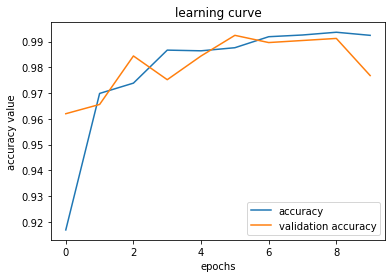

In [23]:
plt.plot(his['accuracy'],label='accuracy')
plt.plot(his['val_accuracy'],label='validation accuracy')
plt.title("learning curve")
plt.xlabel("epochs")
plt.ylabel("accuracy value")
plt.legend()

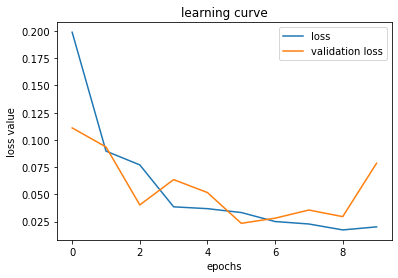

In [24]:
plt.plot(his['loss'],label='loss')
plt.plot(his['val_loss'],label='validation loss')
plt.title('learning curve')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

In [77]:
img=cv2.imread('beautiful-face-png-image.png')
img=cv2.resize(img,(75,75))
img=img.reshape(1,75,75,3)

In [78]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 25ms/step


array([[0., 1.]], dtype=float32)

In [79]:
index=np.argmax(pred)
for i,v in pic_class.items():
    if v==index:
        print('prediction=',i)

prediction= nomask


In [3]:
haar_data=cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

In [4]:
cap=cv2.VideoCapture(0)
labels_dict={0:'mask',1:'nomask'}
color_dict={0:(0,255,0),1:(0,0,255)}
while True:
    flag,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=haar_data.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    modl = keras.models.load_model('facemask.h5')
    
    
    for(x,y,w,h) in faces:
        face_img=img[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(75,75))
        normalized=resized/255
        reshaped=np.reshape(normalized,(1,75,75,3))
        result=modl.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.putText(img,labels_dict[label],(x+50,y+20),cv2.FONT_HERSHEY_PLAIN,0.9,(0,200,0),2)
    cv2.imshow('live',img)
    
    if cv2.waitKey(20)==27:
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 74ms/step
